# Social Network Analysis @ UNIPI
### 22/11/2023

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import ndlib
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [5]:
g = nx.Graph()
g.add_edge(1,5)
g.add_edge(2,9)
g.add_edge(2,3)
g.add_edge(2,6)
g.add_edge(6,3)
g.add_edge(6,9)
g.add_edge(9,3)
g.add_edge(2,8)
g.add_edge(8,4)
g.add_edge(2,7)
g.add_edge(7,12)
g.add_edge(8,11)
g.add_edge(7,11)
g.add_edge(4,11)
g.add_edge(7,10)
g.add_edge(10,11)
g.add_edge(5,12)
g.add_edge(1,12)
g.add_edge(5,9)

In [6]:
%cd

C:\Users\valen


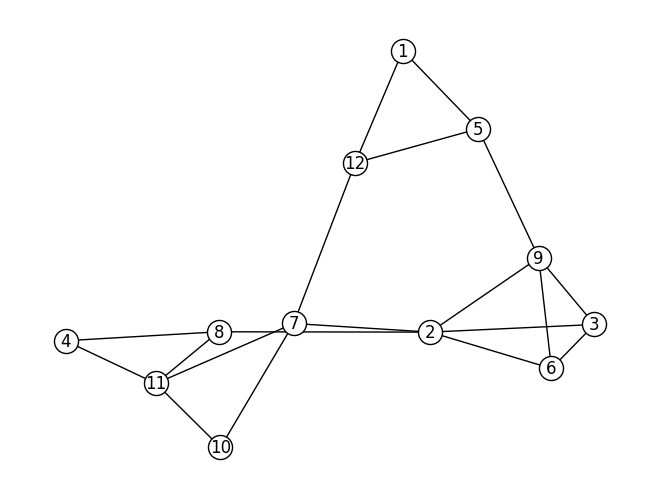

In [8]:
nx.draw(g, with_labels=True, node_color='white', edgecolors='black')
# plt.savefig('20232211_graph.png')

# Exercise 1: Community Evaluation} [5 points]

Given the graph $\mathcal{G}$ shown in Figure 1 compare the following partitions

- #### P1 = [(1,5,12), (2,3,6,9), (7,10,11), (4,8)]
- #### P2 = [(1,2,3), (4,5,6,7,8,9), (10,11,12)]
- #### P3 = [(1,5,12), (10,11,7), (4,8,2,9,6,3)]


Which partition is the best with respect to Internal Edge Density score? and for Average Node Degree?


In [9]:
def ied(graph, community):
    sg = nx.subgraph(graph, community)
    ec = sg.number_of_edges()
    vc = sg.number_of_nodes()
    try:
        return (2*ec)/(vc*(vc-1))
    except:
        return 0

In [10]:
P1 = [[1,5,12], [2,3,6,9], [7,10,11], [4,8]]
P2 = [[1,2,3], [4,5,6,7,8,9], [10,11,12]]
P3 = [[1,5,12], [10,11,7], [4,8,2,9,6,3]]

In [11]:
f"P1 - C1: {ied(g, P1[0])} C2: {ied(g, P1[1])}, C3: {ied(g, P1[2])}"

'P1 - C1: 1.0 C2: 1.0, C3: 1.0'

In [12]:
f"P2 - C1: {ied(g, P2[0])} C2: {ied(g, P2[1])}, C3: {ied(g, P2[2])}"

'P2 - C1: 0.3333333333333333 C2: 0.2, C3: 0.3333333333333333'

In [13]:
f"P3 - C1: {ied(g, P3[0])} C2: {ied(g, P3[1])} C3: {ied(g, P3[2])}"

'P3 - C1: 1.0 C2: 1.0 C3: 0.5333333333333333'

In [14]:
max([1.0, 0.2, 0.53])

1.0

In [33]:
def AND(graph, community):
    degs = [i[1] for i in nx.degree(graph) if i[0] in community]    
    vc = len(community)
    try:
        return sum(degs)/vc
    except:
        return 0

In [35]:
f"P1 - C1: {AND(g, P1[0])} C2: {AND(g, P1[1])}, C3: {AND(g, P1[2])}, C: {AND(g, P1[3])}"

'P1 - C1: 2.6666666666666665 C2: 3.75, C3: 3.3333333333333335, C: 2.5'

In [36]:
f"P2 - C1: {AND(g, P2[0])} C2: {AND(g, P2[1])}, C3: {AND(g, P2[2])}"

'P2 - C1: 3.3333333333333335 C2: 3.1666666666666665, C3: 3.0'

In [37]:
f"P3 - C1: {AND(g, P3[0])} C2: {AND(g, P3[1])} C3: {AND(g, P3[2])}"

'P3 - C1: 2.6666666666666665 C2: 3.3333333333333335 C3: 3.3333333333333335'

In [27]:
max([2.0, 0.6666666666666, 2.0])

2.0

# Exercise 2: Threshold Model} [5 points]

Given the graph $\mathcal{G}$ shown in Figure \ref{img:graph} apply the threshold model considering the following scenarios:

*S1*

    - Set of initial infected nodes: I = {2, 11}
    - Node threshold $\tau = \frac{1}{3}$
    - Blocked nodes: B = {3,4}

*S2*

    - Set of initial infected nodes: I = 4
    - Node threshold $\tau$ = \frac{1}{3}$ if $u \in \{1, 2, 3, 4\}$; 1/4 otherwise

In [40]:
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as epd

# Model selection
model = epd.ThresholdModel(g)

# Model Configuration
config = mc.Configuration()
config.add_model_initial_configuration("Infected", [2, 11])
config.add_model_parameter('blocked', [3,4])

# Setting node parameters
threshold = 1/3
for i in g.nodes():
    config.add_node_configuration("threshold", i, threshold)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(5)
for it in iterations:
    infected = [i for i, v in it['status'].items() if v == 1]
    print(f"Iteration: {it['iteration']} Infected: {infected}")

Iteration: 0 Infected: [2, 11]
Iteration: 1 Infected: [3, 6, 8, 4, 7, 10]
Iteration: 2 Infected: [9, 12]
Iteration: 3 Infected: [1, 5]
Iteration: 4 Infected: []


In [19]:
# Model selection
model = epd.ThresholdModel(g)

# Model Configuration
config = mc.Configuration()
config.add_model_initial_configuration("Infected", [4])

# Setting node parameters
for i in g.nodes():
    if i in [1,2,3,4]:
        threshold = 1/3
        config.add_node_configuration("threshold", i, threshold)
    else:
        threshold = 1/4
        config.add_node_configuration("threshold", i, threshold)

model.set_initial_status(config)

# Simulation execution
iterations = model.iteration_bunch(5)
for it in iterations:
    infected = [i for i, v in it['status'].items() if v == 1]
    print(f"Iteration: {it['iteration']} Infected: {infected}")

Iteration: 0 Infected: [4]
Iteration: 1 Infected: [8, 11]
Iteration: 2 Infected: [7, 10]
Iteration: 3 Infected: [2, 12]
Iteration: 4 Infected: [1, 5, 9, 3, 6]


# Exercise 3: Community Discovery} [4 points]

Given the graph $\mathcal{G}$ shown in Figure 1 compute its communities applying k-clique for k=2,3,4,5. Compute AND (average node degree) score for the partition identified with k=3.

In [20]:
from networkx.algorithms.community import k_clique_communities

k2 = list(k_clique_communities(g, 2))
k2 # complete coverage

[frozenset({1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12})]

In [21]:
k3 = list(k_clique_communities(g, 3))
k3 # complete coverage

[frozenset({1, 5, 12}),
 frozenset({2, 3, 6, 9}),
 frozenset({4, 8, 11}),
 frozenset({7, 10, 11})]

In [23]:
k4 = list(k_clique_communities(g, 4))
k4 

[frozenset({2, 3, 6, 9})]

In [24]:
k5 = list(k_clique_communities(g, 5))
k5 

[]

In [41]:
f"P1 - C1: {AND(g, [1, 5, 12])} C2: {AND(g, [2,3,6,9])}, C3: {AND(g, [4,8,11])}, C4: {AND(g, [7,10,11])}"

'P1 - C1: 2.6666666666666665 C2: 3.75, C3: 3.0, C4: 3.3333333333333335'

# Exercise 4: Open Question [2 points]

For each of the three main epidemics models you studied, provide a real world applications. 
